## Visualizing weights of Keras convolutional layers

- keras-1.1.0
- tensorflow backend

In [1]:
# Import
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.convolutional import Convolution2D
import keras.backend as K
%matplotlib inline

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


(28, 28, 1)


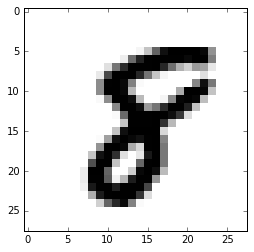

In [3]:
i = 777
x = X_train[i]
print (x.shape)
x = np.reshape(x, (28,28))
plt.imshow(x, interpolation='nearest', cmap=cm.binary)

In [4]:
# Build the model
# Only build 1 layer to visualize convolutional layer weights
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape = (28,28,1))) 
convout1 = Activation('relu')
model.add(convout1)

In [5]:
# Write a function to run this convolutional layer
convout1_f = K.function(model.inputs, [convout1.output])

In [6]:
img = np.reshape(x, (1,28,28,1))
conv = convout1_f([img])
print (type(conv[0]))
y = conv[0]
print (y.shape)
y = np.reshape(y, (26,26,32))

<type 'numpy.ndarray'>
(1, 26, 26, 32)


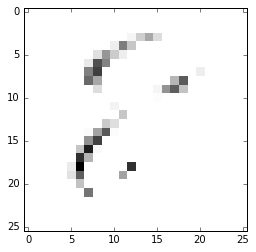

In [7]:
plt.imshow(y[:,:,1], interpolation='nearest', cmap=cm.binary)

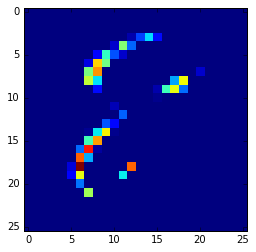

In [8]:
plt.imshow(y[:,:,1], interpolation='nearest')

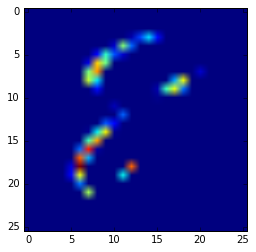

In [9]:
plt.imshow(y[:,:,1])